In [2]:
import pandas as pd
import numpy as np
from functools import reduce

import seaborn as sns

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))

import galileo as gal
import huygens as huy

# Load annotations

In [3]:
merged_tcga_info = pd.read_csv(
    "../data/supplementary/S2_merged-tcga-info.txt", sep="\t", index_col=0
)

In [4]:
tcga_genex = pd.read_hdf(
    "../../data/processed/TCGA/TCGA_genex_norm.h5", key="tcga_genex"
)

normal_genex = tcga_genex[tcga_genex.index.map(lambda x: x[-2:] == "11")]
tcga_genex = tcga_genex[tcga_genex.index.map(lambda x: x[-2:] != "11")]

tcga_splicing = pd.read_hdf("../../data/processed/TCGA/merged.h5", key="tcga_splicing")
tcga_splicing.index = tcga_splicing.index.map(lambda x: x[:15])
tcga_splicing = tcga_splicing[~tcga_splicing.index.duplicated(keep="first")]
tcga_splicing = tcga_splicing[tcga_splicing.index.map(lambda x: x[-2:] != "11")]

tcga_cn = pd.read_hdf(
    "../../data/processed/TCGA/tcga_cn_whitelisted.hdf", key="tcga_cn"
)
tcga_cn = tcga_cn[tcga_cn.index.map(lambda x: x[-2:] != "11")]

tcga_mut_mat = pd.read_hdf(
    "../../data/processed/TCGA/tcga_mut_mat.hdf", key="tcga_mut_mat"
)
tcga_mut_mat = tcga_mut_mat[tcga_mut_mat.index.map(lambda x: x[-2:] != "11")]

In [9]:
rpl22_tcga = pd.read_csv("../data/raw/rpl22.tcga.data.csv")

rpl22_tcga = rpl22_tcga.dropna(subset=["sampleid"])
rpl22_tcga = rpl22_tcga.set_index("sampleid")
rpl22_tcga.index = rpl22_tcga.index.map(lambda x: x[:15])

rpl22_mut = rpl22_tcga["rpl22mut.mc3.k15"].dropna()

tcga_mut_mat["RPL22_chr1_6257785_6257785_T_-"] = rpl22_mut

# MDM4 splicing vs copynumber

In [ ]:
mdm4_splicing_cn = gal.mat_corrs_naive(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_cn,
    method="spearman",
    pbar=True,
)

mdm4_splicing_cn.to_hdf(
    "../data/intermediate/mdm4_splicing_cn.h5", key="mdm4_splicing_cn", mode="w"
)

# RPL22 CN vs splicing

In [ ]:
rpl22_cn_splicing = gal.mat_corrs_naive(
    tcga_cn["RPL22"], tcga_splicing, method="spearman", pbar=True
)

rpl22_cn_splicing.to_hdf(
    "../data/intermediate/rpl22_cn_splicing.h5", key="rpl22_cn_splicing", mode="w"
)

# Splicing and expression correlations

## RPL22L1 expression vs splicing

In [ ]:
rpl22l1_genex_splicing = gal.mat_corrs_naive(
    tcga_genex["RPL22L1_15209"], tcga_splicing, method="spearman", pbar=True
)

rpl22l1_genex_splicing.to_hdf(
    "../data/intermediate/rpl22l1_genex_splicing.h5",
    key="rpl22l1_genex_splicing",
    mode="w",
)

In [ ]:
rpl22l1_genex_splicing_subtyped = gal.mat_corrs_subtyped(
    tcga_genex["RPL22L1_15209"],
    tcga_splicing,
    tcga_sample_info["abbreviated_disease"],
    pbar=True,
    stack=True,
    min_count=50,
    method="spearman",
)

rpl22l1_genex_splicing_subtyped.to_hdf(
    "../data/intermediate/rpl22l1_genex_splicing_subtyped.h5",
    key="rpl22l1_genex_splicing_subtyped",
    mode="w",
)

## Splicing vs gene expression

In [ ]:
mdm4_splicing_genex = gal.mat_corrs_naive(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_genex,
    pbar=True,
    method="spearman",
)

rpl22l1_splicing_genex = gal.mat_corrs_naive(
    tcga_splicing[
        "RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_genex,
    pbar=True,
    method="spearman",
)

mdm4_splicing_genex.to_hdf(
    "../data/intermediate/mdm4_splicing_genex.h5", key="mdm4_splicing_genex", mode="w"
)

rpl22l1_splicing_genex.to_hdf(
    "../data/intermediate/rpl22l1_splicing_genex.h5",
    key="rpl22l1_splicing_genex",
    mode="w",
)

In [ ]:
mdm4_splicing_genex_subtyped = gal.mat_corrs_subtyped(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_genex,
    tcga_sample_info["abbreviated_disease"],
    pbar=True,
    stack=True,
    min_count=50,
    method="spearman",
)

rpl22l1_splicing_genex_subtyped = gal.mat_corrs_subtyped(
    tcga_splicing[
        "RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_genex,
    tcga_sample_info["abbreviated_disease"],
    pbar=True,
    stack=True,
    min_count=50,
    method="spearman",
)

mdm4_splicing_genex_subtyped.to_hdf(
    "../data/intermediate/mdm4_splicing_genex_subtyped.h5",
    key="mdm4_splicing_genex_subtyped",
    mode="w",
)
rpl22l1_splicing_genex_subtyped.to_hdf(
    "../data/intermediate/rpl22l1_splicing_genex_subtyped.h5",
    key="rpl22l1_splicing_genex_subtyped",
    mode="w",
)

# Co-splicing correlations

In [ ]:
mdm4_cosplicing = gal.mat_corrs_naive(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_splicing,
    pbar=True,
    method="spearman",
)

rpl22l1_cosplicing = gal.mat_corrs_naive(
    tcga_splicing[
        "RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_splicing,
    pbar=True,
    method="spearman",
)

mdm4_cosplicing.to_hdf(
    "../data/intermediate/mdm4_cosplicing.h5", key="mdm4_cosplicing", mode="w"
)

rpl22l1_cosplicing.to_hdf(
    "../data/intermediate/rpl22l1_cosplicing.h5", key="rpl22l1_cosplicing", mode="w"
)

In [ ]:
mdm4_cosplicing_subtyped = gal.mat_corrs_subtyped(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_splicing,
    tcga_sample_info["abbreviated_disease"],
    pbar=True,
    stack=True,
    min_count=50,
    method="spearman",
)

rpl22l1_cosplicing_subtyped = gal.mat_corrs_subtyped(
    tcga_splicing[
        "RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_splicing,
    tcga_sample_info["abbreviated_disease"],
    pbar=True,
    stack=True,
    min_count=50,
    method="spearman",
)

mdm4_cosplicing_subtyped.to_hdf(
    "../data/intermediate/mdm4_cosplicing_subtyped.h5",
    key="mdm4_cosplicing_subtyped",
    mode="w",
)
rpl22l1_cosplicing_subtyped.to_hdf(
    "../data/intermediate/rpl22l1_cosplicing_subtyped.h5",
    key="rpl22l1_cosplicing_subtyped",
    mode="w",
)

# Mutation correlations

## Mutations vs MDM4 splicing

In [10]:
mdm4_splicing_mutations = gal.mat_mwus_naive(
    tcga_splicing[
        "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_mut_mat,
    pbar=True,
)

mdm4_splicing_mutations.to_hdf(
    "../data/intermediate/mdm4_splicing_mutations.h5",
    key="mdm4_splicing_mutations",
    mode="w",
)

# RPL22 mutation correlations

## Overall

In [ ]:
rpl22_msi_splicing = gal.mat_mwus_naive(
    tcga_splicing, msi_pos["rpl22mut.mc3.k15"], pbar=True
)

In [ ]:
subset = rpl22_msi_splicing[rpl22_msi_splicing["pos_n"] >= 10]
subset = subset[subset["neg_n"] >= 10]

plt.scatter(subset["corr"], subset["qval"])

In [ ]:
labels = pd.Series(subset.index.map(lambda x: x.split("_")[0]), index=subset.index)

plt.figure(figsize=(3, 4))
ax = plt.subplot(111)

huy.dense_plot(
    subset["corr"],
    subset["qval"],
    labels_mask=subset["qval"] > 3,
    labels=labels,
    adjust=False,
    ax=ax,
    c="black",
)

plt.xlabel("Correlation with RPL22 k15fs")
plt.ylabel("-log10(q-value)")

plt.savefig(
    "../plots/TCGA-MSI_RPL22_truncated_splicing.pdf",
    dpi=512,
    transparent=True,
    bbox_inches="tight",
)

In [ ]:
tcga_sample_info = pd.read_hdf(
    "../../data/processed/TCGA/tcga_sample_info.hdf", key="tcga_sample_info"
)

## MSI-only

In [6]:
msi_pos = merged_tcga_info[merged_tcga_info["MSI"] == True]

In [7]:
rpl22_msi_splicing = gal.mat_mwus_naive(
    tcga_splicing, msi_pos["RPL22_k15fs_mutation"], pbar=True
)

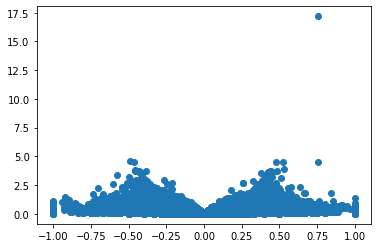

In [10]:
import matplotlib.pyplot as plt

plt.scatter(rpl22_msi_splicing["corr"], rpl22_msi_splicing["qval"])